## Implementacja prostego perceptora z uzyciem numpy

### Porówanie implementacji sekwencyjnej i wektorowej
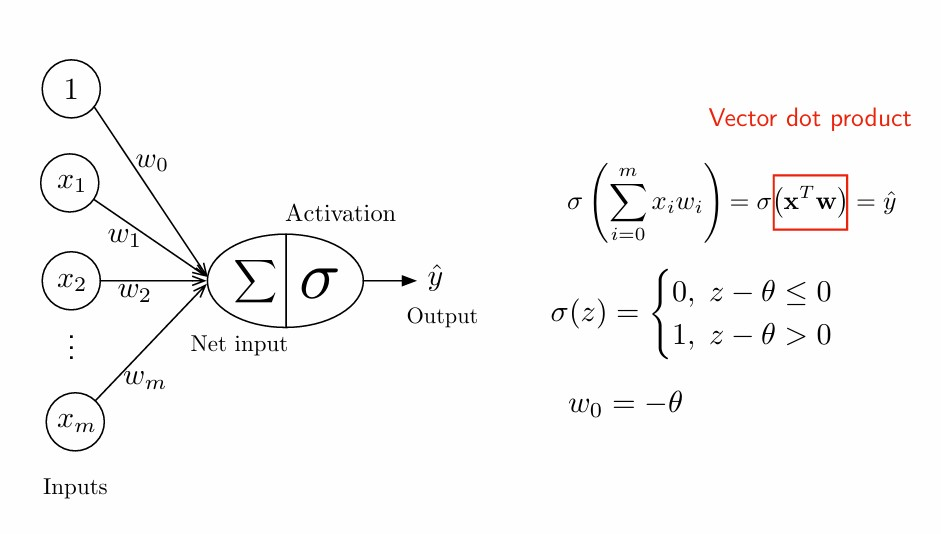

In [1]:
#inicjalizacja wejść i wag
x0, x1, x2 = 1., 2., 3.
bias, w1, w2 = 0.1, 0.3, 0.5

x = [x0, x1, x2]
w = [bias, w1, w2]

In [6]:
#implementacja z użyciem prostej pętli for
z = 0.

for i in range(len(x)):
    z += x[i] * w[i]

print(z)

2.2


In [7]:
#lista składana
z = sum(x_i*w_i for x_i, w_i in zip(x, w))
print(z)

2.2


In [8]:
#wektoryzacja
import numpy as np

x_vec, w_vec = np.array(x), np.array(w)

z = (x_vec.transpose().dot(w_vec))
print(z)

z = x_vec.dot(w_vec)
print(z)

2.2
2.2


### Porównanie wydajności

In [16]:
import timeit

def forloop(x, w):
    z = 0.
    for i in range(len(x)):
        z += x[i] * w[i]
    return z


def listcomprehension(x, w):
    return sum(x_i*w_i for x_i, w_i in zip(x, w))


def vectorized(x, w):
    return x_vec.dot(w_vec)


x, w = np.random.rand(100000), np.random.rand(100000)
x_vec, w_vec = np.array(x), np.array(w)

In [18]:
%timeit -r 100 -n 10 forloop(x, w)

30.7 ms ± 3.83 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [19]:
%timeit -r 100 -n 10 listcomprehension(x, w)

21.1 ms ± 2.68 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [20]:
%timeit -r 100 -n 10 vectorized(x_vec, w_vec)

The slowest run took 129.45 times longer than the fastest. This could mean that an intermediate result is being cached.
37.5 µs ± 173 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
